In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
df = pd.read_csv('../data/consolidated_data/all_malaysia.csv') 
df_vaccine = pd.read_csv('../data/vaccination/vax_malaysia.csv')

In [3]:
df_vaccine['date'] = pd.to_datetime(df_vaccine['date'])

In [4]:
df
df_vaccine

,date,daily_partial,daily_full,daily_booster,daily_booster2,daily,daily_partial_adol,daily_full_adol,daily_booster_adol,daily_booster2_adol,...,sinopharm2,sinopharm3,sinopharm4,cansino,cansino3,cansino4,pending1,pending2,pending3,pending4
0,2021-02-24,66,3,0,0,69,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2021-02-25,1150,2,0,0,1152,0,0,0,0,...,0,0,0,0,0,0,3,0,0,0
2,2021-02-26,4113,3,0,0,4116,1,0,0,0,...,0,0,0,0,0,0,7,0,0,0
3,2021-02-27,6720,6,0,0,6726,0,0,0,0,...,0,0,0,0,0,0,21,0,0,0
4,2021-02-28,6720,6,0,0,6726,0,1,0,0,...,0,0,0,0,0,0,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1152,2024-04-21,0,2,14,0,16,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1153,2024-04-22,1,6,27,13,47,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1154,2024-04-23,1,1,22,6,30,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1155,2024-04-24,5,2,9,6,22,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df = df.drop(columns=['Unnamed: 0', "Unnamed: 0.1"])

In [7]:
df.dtypes

date                        object
cases_new                    int64
cases_import                 int64
cases_recovered              int64
cases_active                 int64
cases_cluster                int64
cases_unvax                  int64
cases_pvax                   int64
cases_fvax                   int64
cases_boost                  int64
cases_child                  int64
cases_adolescent             int64
cases_adult                  int64
cases_elderly                int64
cases_0_4                    int64
cases_5_11                   int64
cases_12_17                  int64
cases_18_29                  int64
cases_30_39                  int64
cases_40_49                  int64
cases_50_59                  int64
cases_60_69                  int64
cases_70_79                  int64
cases_80                     int64
cluster_import             float64
cluster_religious          float64
cluster_community          float64
cluster_highRisk           float64
cluster_education   

In [8]:
df['date'] = pd.to_datetime(df['date'])

In [9]:
df.dtypes

date                       datetime64[ns]
cases_new                           int64
cases_import                        int64
cases_recovered                     int64
cases_active                        int64
cases_cluster                       int64
cases_unvax                         int64
cases_pvax                          int64
cases_fvax                          int64
cases_boost                         int64
cases_child                         int64
cases_adolescent                    int64
cases_adult                         int64
cases_elderly                       int64
cases_0_4                           int64
cases_5_11                          int64
cases_12_17                         int64
cases_18_29                         int64
cases_30_39                         int64
cases_40_49                         int64
cases_50_59                         int64
cases_60_69                         int64
cases_70_79                         int64
cases_80                          

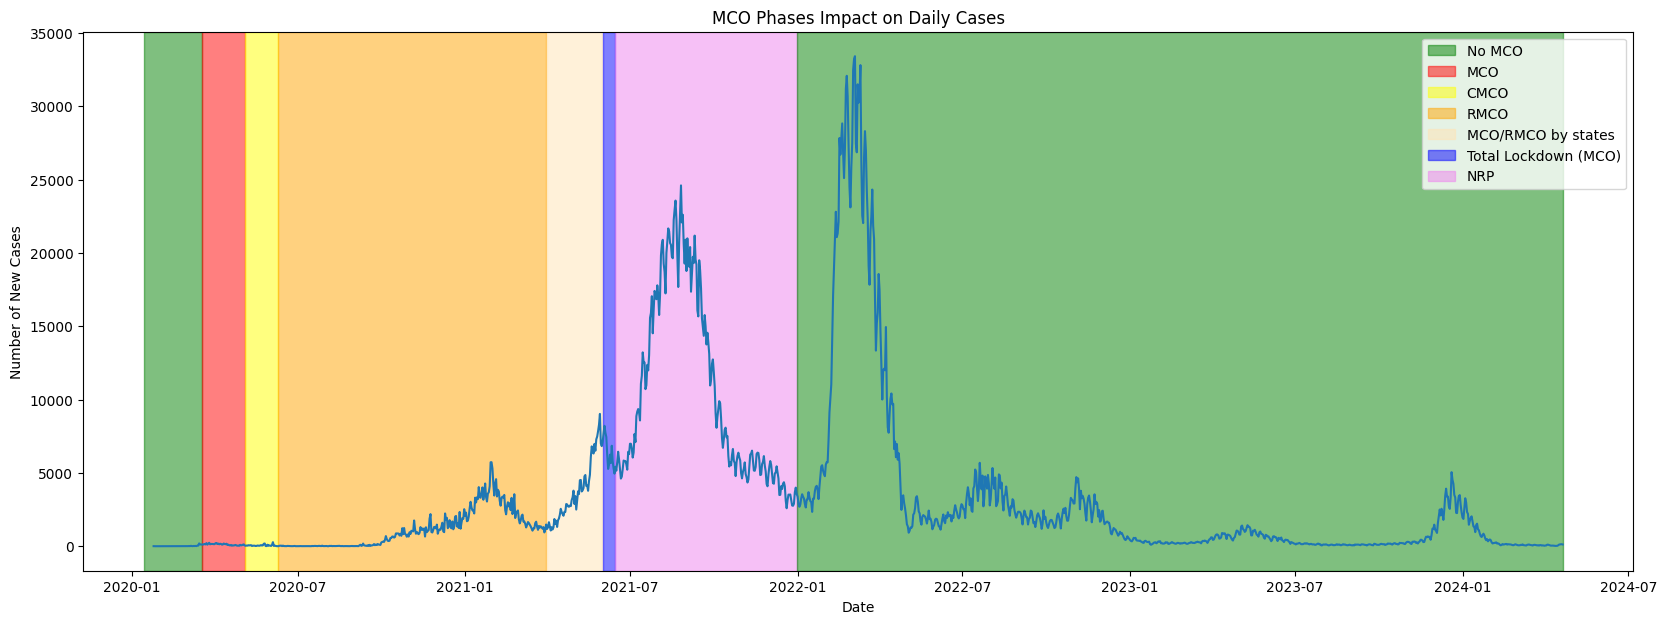

In [10]:
plt.figure(figsize=(20,7))
plt.title("MCO Phases Impact on Daily Cases")
plt.plot(df["date"], df["cases_new"])
plt.xlabel("Date")
plt.ylabel("Number of New Cases")

line0 = datetime.datetime(2020, 1, 15)
line1 = datetime.datetime(2020, 3, 18)
line2 = datetime.datetime(2020, 5, 4)
line3 = datetime.datetime(2020, 6, 10)
line4 = datetime.datetime(2021, 3, 31)

line8 = datetime.datetime(2021, 4, 1)
line9 = datetime.datetime(2021, 5, 31)

line5 = datetime.datetime(2021, 6, 1)
line6 = datetime.datetime(2021, 6, 15)
line7 = datetime.datetime(2021, 12, 31)

line10 = datetime.datetime(2024, 4, 20)

plt.axvspan(line0, line1, alpha=.5, color="green", label="No MCO")

plt.axvspan(line1, line2, alpha=.5, color="red", label="MCO")
plt.axvspan(line2, line3, alpha=.5, color="yellow", label="CMCO")
plt.axvspan(line3, line4, alpha=.5, color="orange", label="RMCO")

plt.axvspan(line8, line9, alpha=.5, color="moccasin", label="MCO/RMCO by states")

plt.axvspan(line5, line6, alpha=.5, color="blue", label="Total Lockdown (MCO)")
plt.axvspan(line6, line7, alpha=.5, color="violet", label="NRP")

plt.axvspan(line7, line10, alpha=.5, color="green")

plt.legend(loc="upper right")

plt.show()

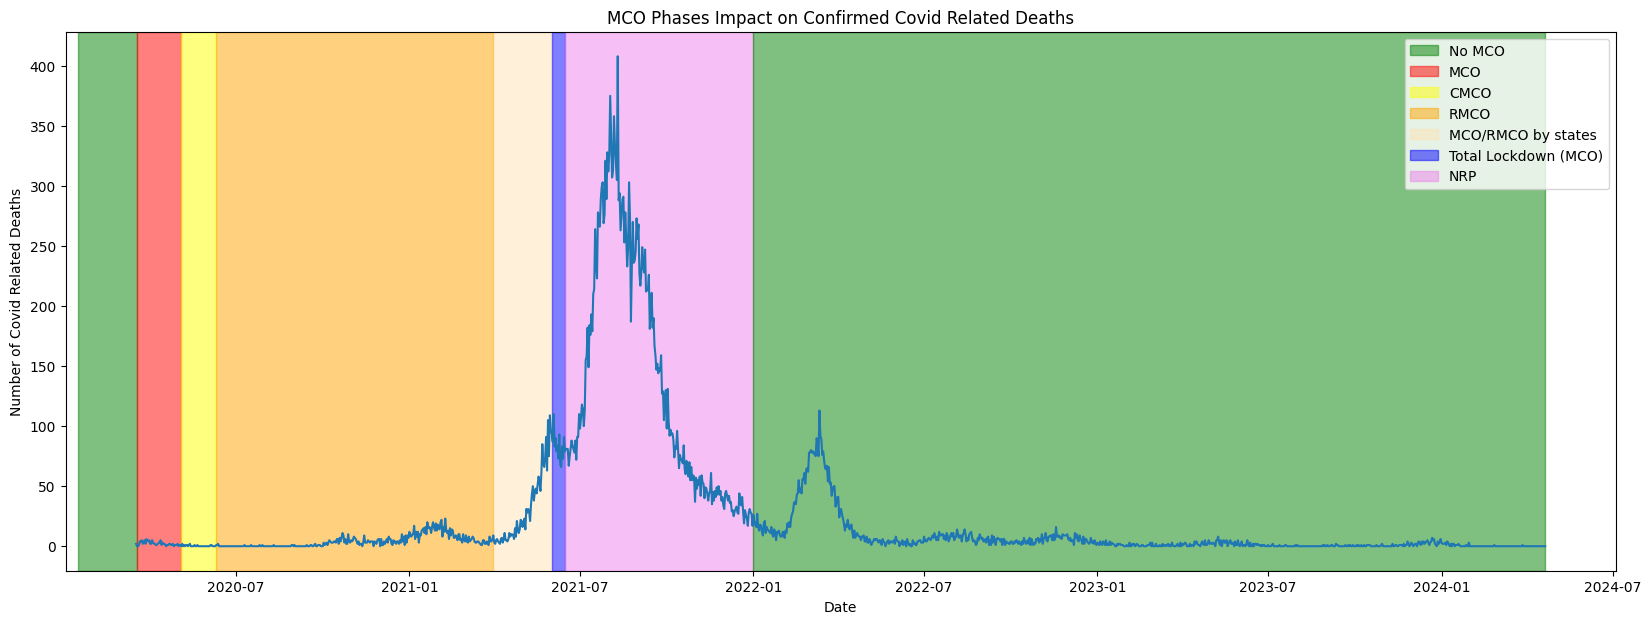

In [11]:
plt.figure(figsize=(20,7))
plt.title("MCO Phases Impact on Confirmed Covid Related Deaths")
plt.plot(df["date"], df["deaths_new_dod"])
plt.xlabel("Date")
plt.ylabel("Number of Covid Related Deaths")

line0 = datetime.datetime(2020, 1, 15)
line1 = datetime.datetime(2020, 3, 18)
line2 = datetime.datetime(2020, 5, 4)
line3 = datetime.datetime(2020, 6, 10)
line4 = datetime.datetime(2021, 3, 31)

line8 = datetime.datetime(2021, 4, 1)
line9 = datetime.datetime(2021, 5, 31)

line5 = datetime.datetime(2021, 6, 1)
line6 = datetime.datetime(2021, 6, 15)
line7 = datetime.datetime(2021, 12, 31)

line10 = datetime.datetime(2024, 4, 20)

plt.axvspan(line0, line1, alpha=.5, color="green", label="No MCO")

plt.axvspan(line1, line2, alpha=.5, color="red", label="MCO")
plt.axvspan(line2, line3, alpha=.5, color="yellow", label="CMCO")
plt.axvspan(line3, line4, alpha=.5, color="orange", label="RMCO")

plt.axvspan(line8, line9, alpha=.5, color="moccasin", label="MCO/RMCO by states")

plt.axvspan(line5, line6, alpha=.5, color="blue", label="Total Lockdown (MCO)")
plt.axvspan(line6, line7, alpha=.5, color="violet", label="NRP")

plt.axvspan(line7, line10, alpha=.5, color="green")

plt.legend(loc="upper right")

plt.show()

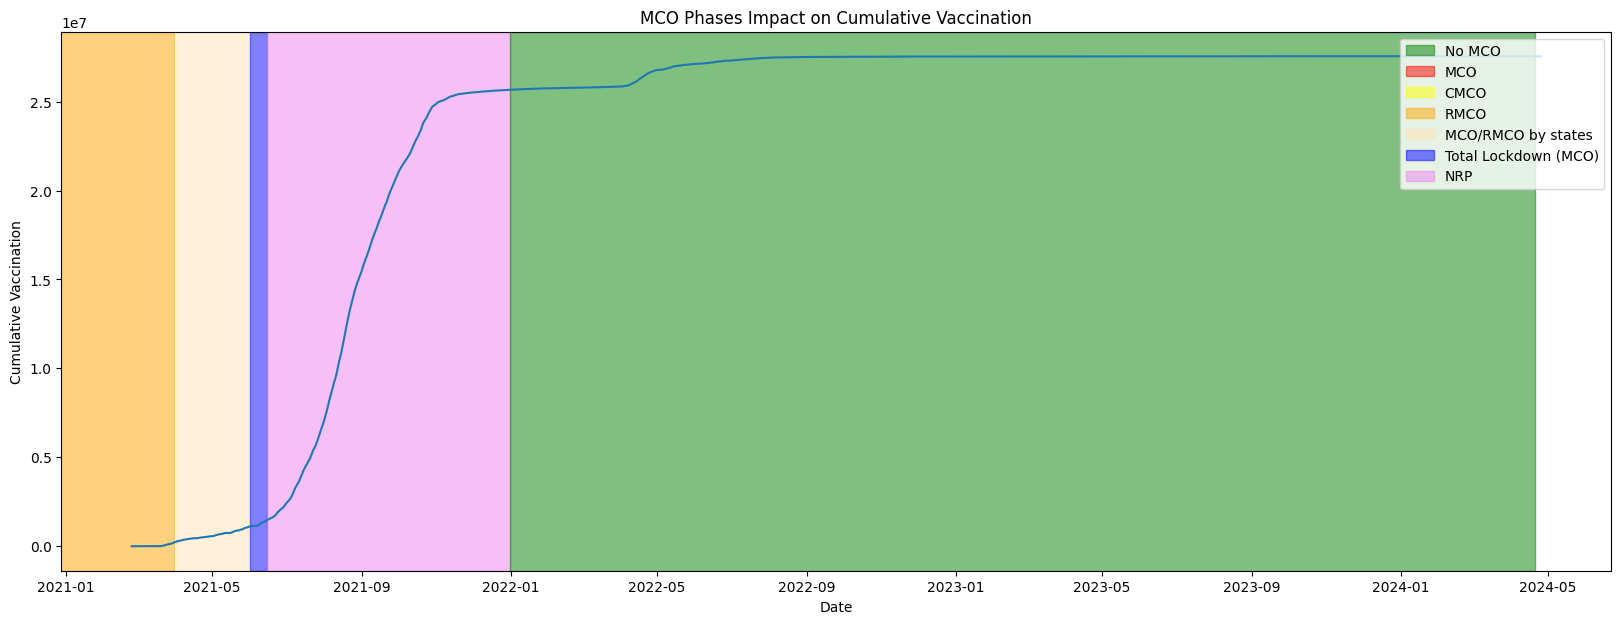

In [12]:
plt.figure(figsize=(20,7))
plt.title("MCO Phases Impact on Cumulative Vaccination")
plt.plot(df_vaccine["date"], df_vaccine["daily_full"].cumsum())
plt.xlabel("Date")
plt.ylabel("Cumulative Vaccination")

line0 = datetime.datetime(2020, 1, 15)
line1 = datetime.datetime(2020, 3, 18)
line2 = datetime.datetime(2020, 5, 4)
line3 = datetime.datetime(2020, 6, 10)
line4 = datetime.datetime(2021, 3, 31)

line8 = datetime.datetime(2021, 4, 1)
line9 = datetime.datetime(2021, 5, 31)

line5 = datetime.datetime(2021, 6, 1)
line6 = datetime.datetime(2021, 6, 15)
line7 = datetime.datetime(2021, 12, 31)

line10 = datetime.datetime(2024, 4, 20)

plt.axvspan(line0, line1, alpha=.5, color="green", label="No MCO")

plt.axvspan(line1, line2, alpha=.5, color="red", label="MCO")
plt.axvspan(line2, line3, alpha=.5, color="yellow", label="CMCO")
plt.axvspan(line3, line4, alpha=.5, color="orange", label="RMCO")

plt.axvspan(line8, line9, alpha=.5, color="moccasin", label="MCO/RMCO by states")

plt.axvspan(line5, line6, alpha=.5, color="blue", label="Total Lockdown (MCO)")
plt.axvspan(line6, line7, alpha=.5, color="violet", label="NRP")

plt.axvspan(line7, line10, alpha=.5, color="green")

plt.legend(loc="upper right")

plt.show()

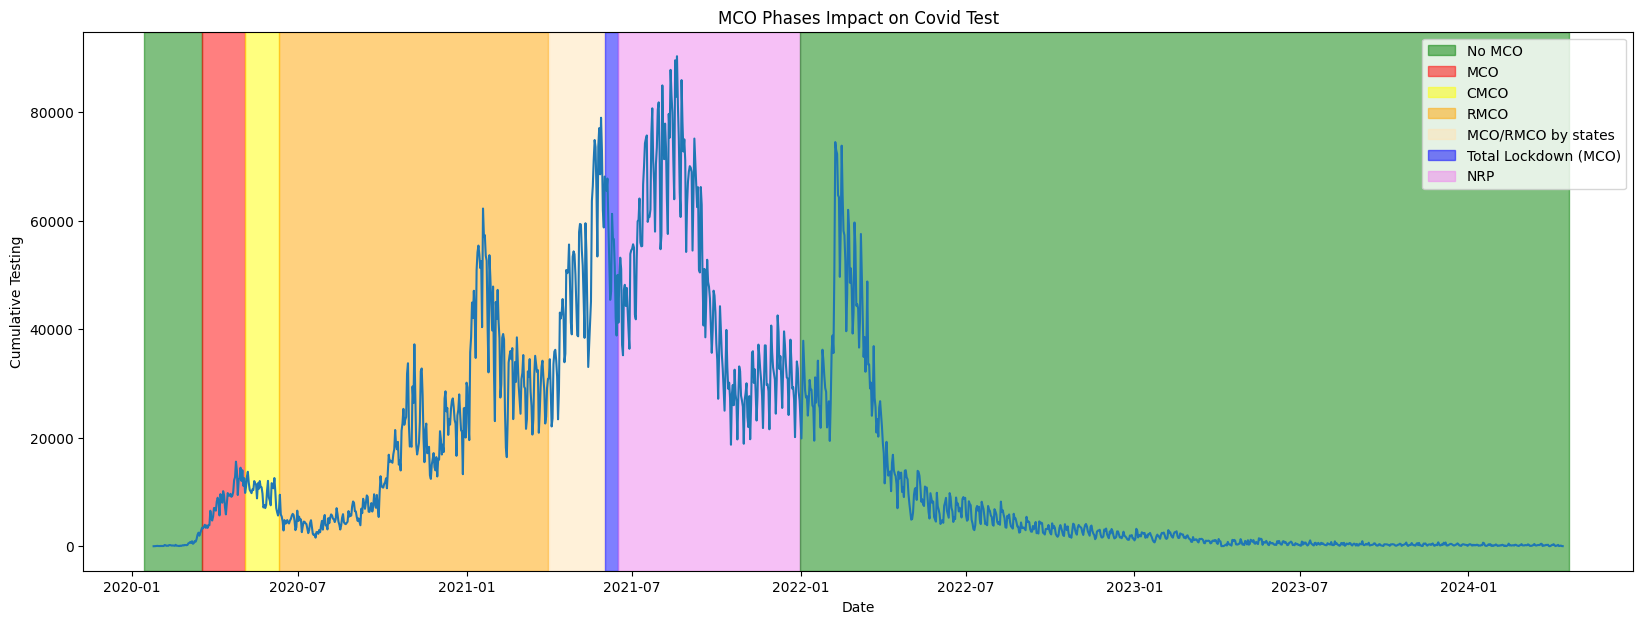

In [16]:
df['total_tests'] = df["pcr"]+df["rtk-ag"]

plt.figure(figsize=(20,7))
plt.title("MCO Phases Impact on Covid Test")
plt.plot(df["date"], df["pcr"])
plt.xlabel("Date")
plt.ylabel("Cumulative Testing")

line0 = datetime.datetime(2020, 1, 15)
line1 = datetime.datetime(2020, 3, 18)
line2 = datetime.datetime(2020, 5, 4)
line3 = datetime.datetime(2020, 6, 10)
line4 = datetime.datetime(2021, 3, 31)

line8 = datetime.datetime(2021, 4, 1)
line9 = datetime.datetime(2021, 5, 31)

line5 = datetime.datetime(2021, 6, 1)
line6 = datetime.datetime(2021, 6, 15)
line7 = datetime.datetime(2021, 12, 31)

line10 = datetime.datetime(2024, 4, 20)

plt.axvspan(line0, line1, alpha=.5, color="green", label="No MCO")

plt.axvspan(line1, line2, alpha=.5, color="red", label="MCO")
plt.axvspan(line2, line3, alpha=.5, color="yellow", label="CMCO")
plt.axvspan(line3, line4, alpha=.5, color="orange", label="RMCO")

plt.axvspan(line8, line9, alpha=.5, color="moccasin", label="MCO/RMCO by states")

plt.axvspan(line5, line6, alpha=.5, color="blue", label="Total Lockdown (MCO)")
plt.axvspan(line6, line7, alpha=.5, color="violet", label="NRP")

plt.axvspan(line7, line10, alpha=.5, color="green")

plt.legend(loc="upper right")

plt.show()